#  Jupyter notebook for tasks 1-4

### This notebook covers tasks 1 through 4 sequentially.

In [1]:
import numpy as np # import numpy for linear algebra operations 
np.random.seed(8)
np.random.RandomState(8)

# Task 1

### Implementing linear and Relu layers 

* A layer can be represnted as a matrix transformation plus
* an activation functions

__Functions__

* Linear function is almost always used in the input layer of a Neural Network. The output is the same as the input.

* ReLu (Rectified Linear Unit) is used in the hidden layers of an NN. This functions adds the much needed non-linearity.
    The output vector is the same dimensionality as the input, it masks however the negative elements with 0s.

In [2]:
weight_matrix = np.random.randn(5,5)
vector = np.random.randn(5)

In [3]:
vector

array([-0.48354095,  0.53546825,  1.16614049,  0.16168311, -0.67283393])

In [4]:
weight_matrix

array([[ 0.09120472,  1.09128273, -1.94697031, -1.38634953, -2.29649157],
       [ 2.4098343 ,  1.72783617,  2.20455628,  0.79482764,  0.9764211 ],
       [-1.18342715,  1.91636361, -1.1233268 , -0.66403547, -0.37835857],
       [-0.79161527,  0.85954811, -0.230789  , -0.06566103, -0.20863623],
       [ 1.34686857, -0.6069528 , -0.17424821,  0.42405142, -1.6459901 ]])

In [5]:
transformed_vector = np.dot(vector,weight_matrix)

In [6]:
transformed_vector

array([-1.16796345,  3.17962356,  0.89187833,  0.02567063,  2.265816  ])

In [7]:
# Relu function 
def relu_activation_batch(matrix):
        
    return np.maximum(0,matrix)

In [8]:
relu_activation_batch(weight_matrix)

array([[0.09120472, 1.09128273, 0.        , 0.        , 0.        ],
       [2.4098343 , 1.72783617, 2.20455628, 0.79482764, 0.9764211 ],
       [0.        , 1.91636361, 0.        , 0.        , 0.        ],
       [0.        , 0.85954811, 0.        , 0.        , 0.        ],
       [1.34686857, 0.        , 0.        , 0.42405142, 0.        ]])

In [9]:
# Linear function 
def linear_activation_batch(matrix):
    
    return matrix

In [10]:
linear_activation_batch(weight_matrix)

array([[ 0.09120472,  1.09128273, -1.94697031, -1.38634953, -2.29649157],
       [ 2.4098343 ,  1.72783617,  2.20455628,  0.79482764,  0.9764211 ],
       [-1.18342715,  1.91636361, -1.1233268 , -0.66403547, -0.37835857],
       [-0.79161527,  0.85954811, -0.230789  , -0.06566103, -0.20863623],
       [ 1.34686857, -0.6069528 , -0.17424821,  0.42405142, -1.6459901 ]])

### Function Derivatives 

__The derivatives of the activation functions are used to calculate the updates for the weights__

* The derivative of the ReLu is defined as: 

    x <= 0 then f(x) = 0, else f(x) = 1

In [11]:
def relu_derivative_batch(matrix):
          
    matrix[matrix<=0] = 0
    matrix[matrix>0] = 1
        
    return matrix
  

In [12]:
relu_derivative_batch(weight_matrix)

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0.]])

# Task 2. Dropout implementation

### Dropout usage and implementation:
    
    
  * Inverted dropout is used
  * Forward and Backward pass
  
  
  Dropout is used for regularization of Neural networks, the most used implementation is called __inverted dropout__ and is used for this implementation.
  
  __Inverted dropout__ differs from the original implemenetation on the fact that during training the activations of the neurons are scallled to account for the neurons that are shut off. Whereas traditional dropout requires the inputs to be scalled at test time.
  
  To apply dropput, the following is done:
  
  1. Creation of mask depending on a probability. Each layer has possibly 30,40 or 50% of its neurons shut down.
  
  2. Forward propagation of the signal using the created mask to shut off neurons.
  
  3. Backward propagation of the error unsing the same masks used during training.
  
  __*Note the dropout effect is applied  before the non-linear activation (ReLu)*__
  
  __*However there is an equivalency between: transform() -> Relu() -> Dropout()   AND   transform() > Dropout() > Relu()*__

### Dropout forward pass

In [13]:
dropout_rate = 0.5

# activation mask for traditional dropout (either on or off)
activation_mask =(np.random.rand(5,5) < dropout_rate)
activation_mask

array([[False,  True,  True, False, False],
       [False,  True,  True,  True, False],
       [ True,  True, False,  True, False],
       [False, False,  True, False, False],
       [False,  True,  True,  True,  True]])

In [14]:
# crate the mask for inverted dropout  (use of scalling for the activations)
activation_mask = (np.random.rand(5,5) < dropout_rate) / dropout_rate
activation_mask

array([[2., 2., 0., 0., 0.],
       [2., 2., 0., 0., 0.],
       [0., 0., 0., 0., 2.],
       [2., 2., 2., 0., 0.],
       [0., 0., 0., 2., 0.]])

In [15]:
### implementing dropout during training

###  The dropout mask is applied to the batch of samples before the non-linear activation
###  However the eefect is simillar if the ReLu activation is used.

In [16]:
# let siganls_batch hold a batch of samples 
signals_batch = np.random.randn(5,5)

In [17]:
signals_batch

array([[ 1.52475348e+00,  3.60535849e-01, -6.10893022e-01,
         9.30246033e-01,  3.56513015e-01],
       [-9.52160595e-01,  1.51927786e-01,  6.34885971e-04,
         3.35023228e-01,  3.74799388e-01],
       [ 7.13816158e-01, -1.20081348e+00,  1.38116116e-03,
        -9.21460027e-01,  4.96227866e-01],
       [-1.33166667e+00, -2.19057049e+00, -4.36072065e-01,
         2.54508722e+00,  1.15008128e+00],
       [ 8.44454668e-02,  2.48624780e+00, -1.94355403e-01,
        -1.86213348e-01,  8.53862857e-01]])

In [18]:
# transformed batch by applyting matrix multiplication
trans_batch = np.dot(signals_batch, weight_matrix)

In [19]:
trans_batch

array([[ 2.24180234,  2.20464234,  0.36053585,  0.71704886,  0.36053585],
       [-0.42543342, -0.4645747 ,  0.15192779,  0.52672717,  0.15192779],
       [ 0.00923054, -1.40707619, -1.20081348, -0.70458561, -1.20081348],
       [-2.37215588, -1.413222  , -2.19057049, -1.04048921, -2.19057049],
       [ 3.42455612,  2.19012451,  2.4862478 ,  3.34011065,  2.4862478 ]])

In [20]:
#  applyting the activation mask 
output_batch = trans_batch * activation_mask #dropout 7
output_batch

array([[ 4.48360468,  4.40928467,  0.        ,  0.        ,  0.        ],
       [-0.85086684, -0.92914939,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , -0.        , -2.40162696],
       [-4.74431176, -2.82644401, -4.38114098, -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  6.6802213 ,  0.        ]])

In [21]:
# Applying the relu function on the batch after dropout
output_batch_dropped = relu_activation_batch(output_batch)
output_batch_dropped

array([[4.48360468, 4.40928467, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 6.6802213 , 0.        ]])

In [22]:
#
# A different version is: 1) Transform   2) Apply Non-linearity(ReLu)   3) Apply Dropout
#
batch = relu_activation_batch(trans_batch)
output_batch = batch * activation_mask

output_batch

array([[4.48360468, 4.40928467, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 6.6802213 , 0.        ]])

# Task 3. Softmax Classifier 


* Softmax classifier 
    * Softmax function 
* Cross-entropy loss function 
* Cross loss at the output layer 
* Cross-entropy gradients through back-propagation 

* Numerical issues for calculating softmax and cross-entropy 


#### __The softmax function is defined as:__ ${\displaystyle \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}{\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}}$

#### The softmax function can be used when we need to present a probability distribution over a discrete variable with n possible values

*However the softmax does suffer from numerical instabilities. These instabilities are called __"overflow"__ and __"underflow"__ problems, and must be dealt with when implementing the function in code*

    More specifically:
        * Underflow: This problem occurs when numbers extremely close to zero are rounded to zero. So a division by zero can occur in the code, which of course is undefined. (The denominator of the Softmax can become zero)
        * Overflow:Overflow occurs when numbers with large magnitude are approximated as ∞ or −∞
        
__*REMEDY:__

Both of these difficulties
can be resolved by instead evaluating softmax(z) where z = x − maxi xi. Simple
algebra shows that the value of the softmax function is not changed analytically by
adding or subtracting a scalar from the input vector. Subtracting maxi xi results
in the largest argument to exp being 0, which rules out the possibility of overflow. Likewise, at least one term in the denominator has a value of 1, which rules out
the possibility of underflow in the denominator leading to a division by zero


        
        

In [23]:
# The softmax function implemented in code 

In [24]:
def softmax_activation_batch(matrix):
          
    z = matrix - np.max(matrix, axis=-1, keepdims=True) #prevent overflow here, with this 
    numerator = np.exp(z)
    denominator = np.sum(numerator,1)
    denominator = denominator.reshape(matrix.shape[0],-1) # (number of samples, 1)
        
    probs = numerator/denominator
        
    return probs      

In [25]:
results = softmax_activation_batch(output_batch)
results 

array([[0.50961842, 0.47311678, 0.00575493, 0.00575493, 0.00575493],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.00124923, 0.00124923, 0.00124923, 0.99500309, 0.00124923]])

In [26]:
# reviewing Softmax implementation 

In [27]:
ones = np.ones((5,5))
ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [28]:
softmax_activation_batch(ones) 

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

### The above approaches, paired with smart genertion of weights coupled with a moderate learning rate, provide much needed stability in the calculations

## __Cross-Entropy loss function__

### When training a Neural Network, we need to optimize for specific loss function(s). In classification tasks the most common optimization function used is the cross-entropy loss between the model output and the empirical distribution, defined by the training set, more specifically the one-hot-encoded vectors, that represent classes.

### The general fromulation of the cross-entropy as covered in information theory, the cross entropy between two probability distributions $\mathbf{p}$ and  $\mathbf{q}$

### $H(p,q) = -\sum_{\forall x} p(x) \log(q(x))$



### The Cross-entropy losss function between the output of a model Neural Network and the empirical distribution, for the supervised machine learning setting is defined as the following:

### Since the vector p is a one-hot encoded vector the expression of the loss can be written as: 

   ### $L = - \mathbf{p} \cdot \log(\mathbf{\hat{q}})$ where $\hat{q}$  is the ouput of the model NN,  $\mathbf{p}$ is the empirical distibution and $\cdot$ is the dot product between the two vectors








In [29]:
#Implementation
def calculate_cost_batch(probs, labels):

      losses = labels * np.log(probs+ 1e-3) # works against underflow
      batch_loss = - losses.sum()
      return batch_loss

In [30]:
labels = [[1,0,0],[0,0,1],[0,1,0]]
ground_truth_labels = np.array(labels)


In [31]:
ground_truth_labels

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [32]:
probs = [[0.258178,0.0444354,0.0635667],[0.171228,0.0846713,0.0736623],[0.179176,0.052993,0.0695325]]
predictions = np.array(probs)


In [33]:
predictions

array([[0.258178 , 0.0444354, 0.0635667],
       [0.171228 , 0.0846713, 0.0736623],
       [0.179176 , 0.052993 , 0.0695325]])

In [34]:
ground_truth_labels

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [35]:
calculate_cost_batch(predictions, ground_truth_labels)

6.863921064747794

In [36]:
 # per pair (probs,label) loss  

In [37]:
def cross_entropy(probs_vector, label_vector):
    
    result = np.dot(probs_vector, label_vector)
    
    logged = np.log(result)
    
    return - logged
    

In [38]:
def calculate_cost_batch(probs, labels):

      losses = labels * np.log(probs) # works against underflow

      batch_loss = - losses.sum()

      return batch_loss

In [39]:
ground_truth_labels[0]

array([1, 0, 0])

In [40]:
predictions[0]

array([0.258178 , 0.0444354, 0.0635667])

In [41]:
cross_entropy(predictions[0],ground_truth_labels[0])

1.3541060094670045

In [42]:
calculate_cost_batch(predictions[0],ground_truth_labels[0])

1.3541060094670045

# Task 4. Implementing a fully connected NN 

1) Data pre-processing(Bespoke jupyter showing the processing)

2) The Neural Network classes

3) The results and presenting the numbers 

### The dataset can be found in this link: http://ufldl.stanford.edu/housenumbers/


In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
# Import the pre-processed dataset

with open("Datasets/processed/pickled_shvt_full_data.pkl", "br") as fh:
    data = pickle.load(fh)
    
train_imgs = data[0].values
test_imgs = data[1].values

train_labels_one_hot = data[2].values
test_labels_one_hot = data[3].values

train_labels = data[4]
test_labels = data[5]


In [4]:
print(train_imgs.shape)
print(train_labels_one_hot.shape)
print(train_labels.shape)

(73257, 1024)
(73257, 10)
(73257, 1)


In [5]:
test_imgs

array([[0.32058824, 0.32447059, 0.32447059, ..., 0.35164706, 0.35164706,
        0.35552941],
       [0.54576471, 0.54576471, 0.54576471, ..., 0.42929412, 0.46811765,
        0.52635294],
       [0.63505882, 0.64670588, 0.65447059, ..., 0.64670588, 0.64670588,
        0.64670588],
       ...,
       [0.49917647, 0.50305882, 0.51082353, ..., 0.58458824, 0.59623529,
        0.60788235],
       [0.29341176, 0.28952941, 0.28176471, ..., 0.40211765, 0.37882353,
        0.35164706],
       [0.33611765, 0.32058824, 0.30117647, ..., 0.30117647, 0.30505882,
        0.30505882]])

### Simple NN class 

* Flexible architecture 
* Classfiication task 
* Cross-entropy optimization 
* Flexible batch size of samples

In [6]:
np.random.seed(8)
np.random.RandomState(8)


In [7]:

class simple_nn:
    
    def linear_activation_batch(self,matrix):
          return matrix

      
    def relu_activation_batch(self,matrix):
          return np.maximum(0,matrix)
    
      
    def relu_derivative_batch(self, matrix):
          
        matrix[matrix<=0] = 0
        matrix[matrix>0] = 1
        
        return matrix
  
      

      
    def softmax_activation_batch(self, matrix):
          
        z = matrix - np.max(matrix, axis=-1, keepdims=True) #prevent numerical problems by shifting the distribution
        numerator = np.exp(z)
        denominator = np.sum(numerator,1)
        denominator = denominator.reshape(matrix.shape[0],-1) 
        probs = numerator/denominator
        
        return probs      
          



    def __init__(self, architecture = [1024, 100, 10] , bias = False, activation = 'RELU',  
                 learning_rate = 0.00015):
        
        self.bias = bias
        
        self.activation = activation
        
        self.architecture = architecture
        
        self.learning_rate = learning_rate
                
        self.initialize_weights() #initialize weights by taking into account the architecture
        
      
        
    def initialize_weights(self):
            
            self.weights = []
            self.biases = []
            
            #initialize weights for arbitrary lenght NN 
            
            for _ in range(len(self.architecture)-1):
                
                weight_matrix = np.random.normal(loc=0.0,scale=2/np.sqrt(self.architecture[_]+self.architecture[_+1]),
                                                 size=(self.architecture[_],self.architecture[_+1]))
                
                self.weights.append(weight_matrix)
                
                #biases = np.random.normal(loc=0.0, scale=1,size=(self.architecture[i+1]))





    def calculate_cost_batch(self, probs, labels):
          
          losses = labels * np.log(probs+ 1e-5) # works against underflow
          
          batch_loss = - losses.sum()
          
          return batch_loss


        
        
    def train_on_batch(self, batch_samples, batch_labels):
        
          batch_probs, hidden_activations = self.forward_batch_propagation(batch_samples)
                      
          #calculate batch loss      
          batch_loss = self.calculate_cost_batch( batch_probs, batch_labels )
          self.batch_loss = batch_loss       
                
          ####update weights for the batch, first backpropagate the error, and then update each weight matrix
                
          self.update_weights_batch( batch_probs, hidden_activations, batch_labels, batch_samples )
                
          return True       
                
                
                
                
                

          
    def forward_batch_propagation(self, batch_samples):
        
        # propagate the batch signal through the network, not using biases 
        input_batch = batch_samples
        hidden_activations = [] # needed for gradient calculation
        
        for weight in self.weights:
            
            trans_batch = np.dot(input_batch, weight) #matrix multiplication, no biasses added
            
            if weight.shape[1] == 10: #if we are multipying the by the final weight matrix
                #apply softmax activation to the batch
                probabilities_batch = self.softmax_activation_batch(trans_batch)
                break
                
                
            elif self.activation == 'RELU':   
                
                output_batch = self.relu_activation_batch(trans_batch)
                hidden_activations.append(output_batch)
                
            elif self.activation == 'LINEAR':
                
                output_batch = self.linear_activation_batch(trans_batch)
                hidden_activations.append(output_batch)

                
            input_batch = output_batch
                
            
        #logits_batch = np.dot(batch_samples, self.weights)
        
        #probabilities_batch = self.softmax_activation_batch(logits_batch)
        
        #print('Probs ',probabilities)
        
        #print (' \n Probs sum', probabilities.sum() )
        
        return probabilities_batch, hidden_activations
                  
        
  
      
     # back-propagation and update of the weights of the Neural Network 
     #
     # back-propagation of loss from the ouput layer using the Transpose of the weights 
     
     #
     # update of the weights using the hidden activation of each layer 
     #
     
     
    def update_weights_batch(self, batch_probs, hidden_activations, batch_labels, batch_samples) :
          
          hidden_activations.reverse()
          
          output_layer_error = batch_probs - batch_labels # error to propagate 
          
          weights_list = list(self.weights)
          weights_list.reverse()
          
          
          # back-propagation of the error along with the derivative of the activation function (relu)
          # the errors include the the derivatives of the activation functions
          
          layer_errors = []  # reverse this if needed
          
          layer_errors.append(output_layer_error.T)
         
          
          error_l = output_layer_error
          
          # for an NN with 2 hidden layers, 2 back-propagation methods will be run
          
          # add clause for linear and sigmoid derivative apropriatly.
          
          # back-prop of the eror to every layer in the network 
          for i in range(len(weights_list)-1):
                
                error_term = np.dot(weights_list[i],error_l.T)
                
                derivative_term = self.relu_derivative_batch(hidden_activations[i].T)
                
                #element-wise multiplication for the full error expression
                error_l_minus = error_term * derivative_term
                
                layer_errors.append(error_l_minus)
                
                error_l = error_l_minus.T
                
                
          # layer errors created here. 
          
          # update weights here using the layer errors and the hidden activations 
          activations = list(hidden_activations)
          activations.reverse()
          
          activations.insert(0,batch_samples)
          activations.reverse()

          #activations.append(batch_probs)
          
          # check for possible regularization here 
          #weights_list.reverse()
          
          for i in range(len(layer_errors)):
                
                #self.weights[i] or self.weights = reverse_weight_list
                
                weight_update = np.dot(layer_errors[i],activations[i])
                
                #check for l2 regularizer here... as an if__then clause 
                
                weights_list[i] -= self.learning_rate * weight_update.T #take some of the gradient using learning rate
                
          
          
          #final update, update network parameters to new weights

          weights_list.reverse()          
          self.weights = weights_list

      
      
      
    def evaluate(self,data,labels):
        
        corrects, wrongs = 0, 0
        
        for i in range(len(data)):
              
            res = self.infer_sample(data[i])
            #sumaaaaaaaaaaaa = res.sum()
            res_max = res.argmax()
            #ruin=labels[i]
            
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs    




    def infer_sample(self,sample):
        #use this function to get a sample prediction, after the network has been trained   
        prediction = self.signal_propagation_test(sample)
          
        return prediction  
  
   
    def signal_propagation_test(self,sample):
          
          # get a prediction-class, for a sample vector, forward propagation
                    
          trans_vector = sample
          
          for weight in self.weights:
                
                trans_vector = np.dot(trans_vector, weight) # matrix transformation 
                
                trans_vector = self.relu_activation_batch(trans_vector) # relu activation, no bias added
                
          prediction = trans_vector 
          
          return prediction
                
            
            

In [8]:
np.random.seed(8)
np.random.RandomState(8)


simple_nn1 = simple_nn( architecture = [1024,100,100,10], bias = False, activation = 'RELU',  learning_rate = 0.0001)


In [9]:
### Test the network with no training 
corrects, wrongs = simple_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy before TRAINING ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy before TRAINING  0.07559926244622003 



In [10]:
# Mini-batch gradient descent 

batch_size = 256 #size of the mini-batch
epochs = 50 
simple_nn1_iteration_losses = [] #should be the same len aas the number of iterations
simple_nn1_epoch_accuracies = []

#Print training elements
num_of_batches = train_imgs.shape[0] / batch_size
num_of_iterations = round(epochs * num_of_batches)

print ('\n Batch size',batch_size )
print('_________________________________________________')


print ('\n Number of batches per epoch',num_of_batches )
print('_________________________________________________')

print ('\n Rough number of iterations to perform:',num_of_iterations )
print('_________________________________________________')

print ('\n Number of epochs over the dataset to perform:',epochs )
print('_________________________________________________')



 Batch size 256
_________________________________________________

 Number of batches per epoch 286.16015625
_________________________________________________

 Rough number of iterations to perform: 14308
_________________________________________________

 Number of epochs over the dataset to perform: 50
_________________________________________________


In [11]:
#
# Training script 
# 
#for each epoch 

np.random.seed(8)
np.random.RandomState(8)

for epoch in range(epochs):

            # cycle through all minibatches of data
            n_samples = train_imgs.shape[0]
            #shuffle entire dataset indices for proper mini-batch GD
            indices = np.arange(train_imgs.shape[0])
            np.random.shuffle(indices)
            
            for start in range(0, n_samples, batch_size):
            
                  end = min (start + batch_size, n_samples)
                  batch_indices = indices[start:end]
                  
                  #train nn on mini-batch data
                  simple_nn1.train_on_batch(train_imgs[batch_indices],train_labels_one_hot[batch_indices])
                  
                  #save loss on the mini-batch
                  simple_nn1_iteration_losses.append(simple_nn1.batch_loss)

            
            #Evaluate training accuracy after each iteration
            corrects, wrongs = simple_nn1.evaluate(train_imgs, train_labels) #this is the integer representation
            accu = corrects / ( corrects + wrongs)
            print('_________________________________________________\n')
            print("Training accuracy after epoch ", accu, '\n')
            simple_nn1_epoch_accuracies.append(accu)
            
            #epoch completed 
            print ("Epochs completed {} / {} ".format(epoch+1,epochs))

      

_________________________________________________

Training accuracy after epoch  0.2544739751832589 

Epochs completed 1 / 50 
_________________________________________________

Training accuracy after epoch  0.2818843250474357 

Epochs completed 2 / 50 
_________________________________________________

Training accuracy after epoch  0.39911544289282935 

Epochs completed 3 / 50 
_________________________________________________

Training accuracy after epoch  0.4265530939022892 

Epochs completed 4 / 50 
_________________________________________________

Training accuracy after epoch  0.46794163015138485 

Epochs completed 5 / 50 
_________________________________________________

Training accuracy after epoch  0.49077903818065166 

Epochs completed 6 / 50 
_________________________________________________

Training accuracy after epoch  0.5183122431986021 

Epochs completed 7 / 50 
_________________________________________________

Training accuracy after epoch  0.5256152995618166 

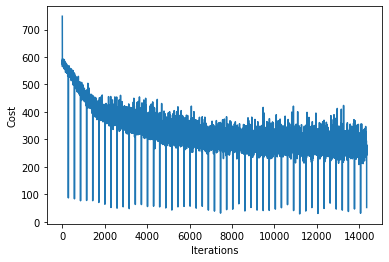

In [12]:
plt.plot(range(len(simple_nn1_iteration_losses)), simple_nn1_iteration_losses)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#plt.savefig('loss.png', dpi=300)
plt.show()


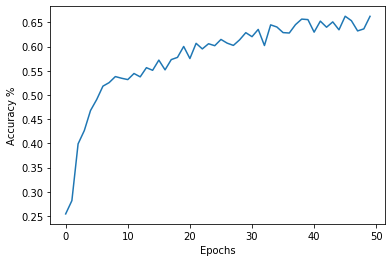

In [13]:
plt.plot(range(epochs), simple_nn1_epoch_accuracies)
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()

In [14]:

corrects, wrongs = simple_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy after training  0.6284188690842041 



### 2nd Simple Model [1024,200,200,10] to compare with a different architecture

In [15]:
np.random.seed(8)
np.random.RandomState(8)

simple_nn2 = simple_nn( architecture = [1024,200,200,200,10], bias = False, activation = 'RELU',  learning_rate = 0.0001)

### Test the network with no training 
corrects, wrongs = simple_nn2.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy before TRAINING ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy before TRAINING  0.10029963122311002 



In [16]:
simple_nn2_iteration_losses = [] #should be the same len aas the number of iterations
simple_nn2_epoch_accuracies = []

np.random.seed(8)
np.random.RandomState(8)

for epoch in range(epochs):

            n_samples = train_imgs.shape[0]
            indices = np.arange(train_imgs.shape[0])
            np.random.shuffle(indices)
            
            for start in range(0, n_samples, batch_size):
            
                  end = min (start + batch_size, n_samples)
                  batch_indices = indices[start:end]
                  
                  simple_nn2.train_on_batch(train_imgs[batch_indices],train_labels_one_hot[batch_indices])
                  
                  simple_nn2_iteration_losses.append(simple_nn2.batch_loss)

            
            #Evaluate training accuracy after each iteration
            corrects, wrongs = simple_nn2.evaluate(train_imgs, train_labels) #this is the integer representation
            accu = corrects / ( corrects + wrongs)
            print('_________________________________________________\n')
            print("Training accuracy after epoch ", accu, '\n')
            simple_nn2_epoch_accuracies.append(accu)
            
            #epoch completed 
            print ("Epochs completed {} / {} ".format(epoch+1,epochs))


_________________________________________________

Training accuracy after epoch  0.28703059093328964 

Epochs completed 1 / 50 
_________________________________________________

Training accuracy after epoch  0.32962037757483925 

Epochs completed 2 / 50 
_________________________________________________

Training accuracy after epoch  0.48257504402309676 

Epochs completed 3 / 50 
_________________________________________________

Training accuracy after epoch  0.4893730291985749 

Epochs completed 4 / 50 
_________________________________________________

Training accuracy after epoch  0.5517424955976903 

Epochs completed 5 / 50 
_________________________________________________

Training accuracy after epoch  0.5672085944005351 

Epochs completed 6 / 50 
_________________________________________________

Training accuracy after epoch  0.5827019943486629 

Epochs completed 7 / 50 
_________________________________________________

Training accuracy after epoch  0.5799172775297924 

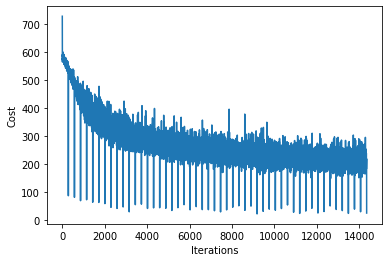

In [17]:
plt.plot(range(len(simple_nn2_iteration_losses)), simple_nn2_iteration_losses)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#plt.savefig('loss.png', dpi=300)
plt.show()

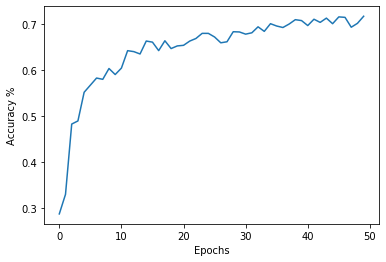

In [18]:
plt.plot(range(epochs), simple_nn2_epoch_accuracies)
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()

In [19]:
corrects, wrongs = simple_nn2.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy after training  0.6871926859250154 



### Comparative results 

### Model 1 vs Model 2. 

__The deeper model exhibits higher accuracy, which means that the model imroves with deeper architectures.__

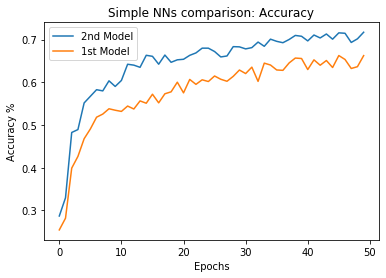

In [20]:
plt.plot(range(epochs), simple_nn2_epoch_accuracies, label = '2nd Model')
plt.plot(range(epochs), simple_nn1_epoch_accuracies, label = '1st Model')
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.title('Simple NNs comparison: Accuracy')
plt.savefig('Result metrics//simple_NNs_accuracy.png', dpi=300)
plt.show()

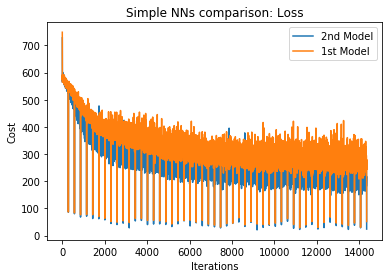

In [21]:
plt.plot(range(len(simple_nn2_iteration_losses)), simple_nn2_iteration_losses, label= '2nd Model')
plt.plot(range(len(simple_nn1_iteration_losses)), simple_nn1_iteration_losses, label= '1st Model')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Simple NNs comparison: Loss')
plt.legend(loc="upper right")
plt.savefig('Result metrics//simple_NNs_loss.png', dpi=300)
plt.show()

### NN class with  L2 regularization

* Optional parameter of L2 regularization
* Change in the update_weights_batch() function
* Change in the training script

In [22]:
class regularized_nn:
    
      
    def linear_activation_batch(self,matrix):
          
          return matrix

    def relu_activation_batch(self,matrix):
          
          
          return np.maximum(0,matrix)
    
    def relu_derivative_batch(self, matrix):
          
        matrix[matrix<=0] = 0
        matrix[matrix>0] = 1
        
        return matrix
  
    def softmax_activation_batch(self, matrix):
          
        z = matrix - np.max(matrix, axis=-1, keepdims=True) #prevent overflow here, with this 
        numerator = np.exp(z)
        denominator = np.sum(numerator,1)
        denominator = denominator.reshape(matrix.shape[0],-1) # (number of samples, 1)
        
        probs = numerator/denominator
        
        return probs      
          

    def __init__(self, architecture = [1024, 100, 10] , bias = False, activation = 'RELU',  learning_rate = 0.0015, 
                 regularizer_l2 = False, L2_term = 0.0):
        
        self.bias = bias
        
        self.activation = activation
        
        self.architecture = architecture
        
        self.learning_rate = learning_rate
        
        self.regularizer_l2 = regularizer_l2
        
        self.L2_term = L2_term
        
        self.initialize_weights() #initialize weights by taking into account the architecture
        
      
        
    def initialize_weights(self):
            
            self.weights = []
            self.biases = []
            
            #initialize weights for arbitrary lenght NN 
            
            for _ in range(len(self.architecture)-1):
                
                weight_matrix = np.random.normal(loc=0.0,scale=2/np.sqrt(self.architecture[_]+self.architecture[_+1]),
                                                 size=(self.architecture[_],self.architecture[_+1]))
                
                self.weights.append(weight_matrix)
                
                #biases = np.random.normal(loc=0.0, scale=1,size=(self.architecture[i+1]))

  
    def calculate_cost_batch(self, probs, labels):
          
          losses = labels * np.log(probs+ 1e-5) # works against underflow
                    
          batch_loss = - losses.sum()
          
          return batch_loss


        
        
    def train_on_batch(self, batch_samples, batch_labels):
        
          batch_probs, hidden_activations = self.forward_batch_propagation(batch_samples)
         
          #calculate batch loss      
          batch_loss = self.calculate_cost_batch( batch_probs, batch_labels )
          self.batch_loss = batch_loss       
                                
          self.update_weights_batch( batch_probs, hidden_activations, batch_labels, batch_samples )
               
                
          return True       
                
              
          
    def forward_batch_propagation(self, batch_samples):
        
        # propagate the batch signal through the network, not using biases 
        input_batch = batch_samples
        hidden_activations = [] # needed for gradient calculation
        
        for weight in self.weights:
            
            trans_batch = np.dot(input_batch, weight) #matrix multiplication, no biasses added
            
            if weight.shape[1] == 10: #if we are multipying the by the final weight matrix
                #apply softmax activation to the batch
                probabilities_batch = self.softmax_activation_batch(trans_batch)
                break
                
                
            elif self.activation == 'RELU':   
                
                output_batch = self.relu_activation_batch(trans_batch)
                hidden_activations.append(output_batch)

            input_batch = output_batch
        
        return probabilities_batch, hidden_activations
                  
     
    def update_weights_batch(self, batch_probs, hidden_activations, batch_labels, batch_samples) :
          
          hidden_activations.reverse()
          
          output_layer_error = batch_probs - batch_labels # error to propagate 
          
          weights_list = list(self.weights)
          weights_list.reverse()
          
          layer_errors = []  # reverse this if needed
          
          layer_errors.append(output_layer_error.T)
         
          
          error_l = output_layer_error
        
          for i in range(len(weights_list)-1):
                
                error_term = np.dot(weights_list[i],error_l.T)
                
                if self.activation == 'RELU':
                
                      derivative_term = self.relu_derivative_batch(hidden_activations[i].T)
                                            
                
                #element-wise multiplication for the full error expression
                error_l_minus = error_term * derivative_term
                
                layer_errors.append(error_l_minus)
                
                error_l = error_l_minus.T
                
          activations = list(hidden_activations)
          activations.reverse()
          
          activations.insert(0,batch_samples)
          activations.reverse()

          for i in range(len(layer_errors)):
                
                
                weight_update = np.dot(layer_errors[i],activations[i])
                
                weight_update = weight_update +  (self.L2_term * weights_list[i].T)
                
                
                weights_list[i] -= self.learning_rate * weight_update.T #take some of the gradient using learning rate
                
          weights_list.reverse()
          
          self.weights = weights_list

      
    def evaluate(self,data,labels):
        corrects, wrongs = 0, 0  
        for i in range(len(data)):
              
            res = self.infer_sample(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs    

    def infer_sample(self,sample):
        #use this function to get a sample prediction, after the network has been trained   
        prediction = self.signal_propagation_test(sample)
          
        return prediction  
  
   
    def signal_propagation_test(self,sample):    
          trans_vector = sample
      
          for weight in self.weights:
                trans_vector = np.dot(trans_vector, weight) # matrix transformation 
                trans_vector = self.relu_activation_batch(trans_vector) # relu activation, no bias added  
          prediction = trans_vector 
          
          return prediction
                
            
            

In [23]:
np.random.seed(8)
np.random.RandomState(8)

reg_nn1 = regularized_nn(architecture = [1024,100,100,10], bias = False, activation = 'RELU',  
              learning_rate = 0.0001, regularizer_l2 = True,  L2_term = 0.5)


In [24]:
### Test the network with no training 
corrects, wrongs = reg_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy before TRAINING ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy before TRAINING  0.07559926244622003 



In [25]:
# Mini-batch gradient descent parameters

batch_size = 256 #size of the mini-batch
epochs = 50 
reg_nn1_iteration_losses = [] #should be the same len aas the number of iterations
reg_nn1_epoch_accuracies = []
reg_nn1_epoch_costs = [] # should match the number of epochs set


#Print training elements
num_of_batches = round(train_imgs.shape[0] / batch_size) + 1
num_of_iterations = epochs * num_of_batches

print ('\n Batch size',batch_size )
print('_________________________________________________')


print ('\n Number of batches per epoch',num_of_batches )
print('_________________________________________________')

print ('\n Number of iterations to perform:',num_of_iterations )
print('_________________________________________________')
print('_________________________________________________\n')



 Batch size 256
_________________________________________________

 Number of batches per epoch 287
_________________________________________________

 Number of iterations to perform: 14350
_________________________________________________
_________________________________________________



In [26]:
## Training script 
np.random.seed(8)
np.random.RandomState(8)

for epoch in range(epochs):

            # cycle through all minibatches of data
            n_samples = train_imgs.shape[0]
            #shuffle entire dataset indices for proper mini-batch GD
            indices = np.arange(train_imgs.shape[0])
            np.random.shuffle(indices)
            
            for start in range(0, n_samples, batch_size):
            
                  end = min (start + batch_size, n_samples)
                  batch_indices = indices[start:end]
                  
                  #train nn on mini-batch data
                  reg_nn1.train_on_batch(train_imgs[batch_indices],train_labels_one_hot[batch_indices])
                  
                  #get mnin-batch cross-entropy loss term 
                  cel = reg_nn1.batch_loss
                  
                  #create l2 term for loss calculation
                  #l2_cost = (nn.L2_term / 2) * np.sum(np.square(nn.weights))
                  
                  weight_squared_sums = [np.sum(np.square(weight_matrix)) for weight_matrix in reg_nn1.weights]
                  
                  l2_cost = (reg_nn1.L2_term / 2) * np.array(weight_squared_sums).sum()
            
                  overall_cost = cel + l2_cost                       
                  
                  #save loss on the mini-batch
                  reg_nn1_iteration_losses.append(overall_cost)
                  
            epoch_loss = reg_nn1_iteration_losses[-num_of_batches:] # GET THE LAST X ITERTIONS THAT MAKE UP THE EPOCH 
            reg_nn1_epoch_costs.append(np.array(epoch_loss).sum())

            
            #Evaluate training accuracy after each iteration
            corrects, wrongs = reg_nn1.evaluate(train_imgs, train_labels) #this is the integer representation
            accu = corrects / ( corrects + wrongs)
            print('_________________________________________________\n')
            print("Training accuracy after epoch ", accu, '\n')
            reg_nn1_epoch_accuracies.append(accu)
            
            #epoch completed 
            print ("Epochs completed {} / {} ".format(epoch+1,epochs))

      


_________________________________________________

Training accuracy after epoch  0.24811280833230953 

Epochs completed 1 / 50 
_________________________________________________

Training accuracy after epoch  0.28849120220593255 

Epochs completed 2 / 50 
_________________________________________________

Training accuracy after epoch  0.3940920321607491 

Epochs completed 3 / 50 
_________________________________________________

Training accuracy after epoch  0.4084660851522721 

Epochs completed 4 / 50 
_________________________________________________

Training accuracy after epoch  0.45081016148627434 

Epochs completed 5 / 50 
_________________________________________________

Training accuracy after epoch  0.4788211365466781 

Epochs completed 6 / 50 
_________________________________________________

Training accuracy after epoch  0.4923079023165022 

Epochs completed 7 / 50 
_________________________________________________

Training accuracy after epoch  0.4911339530693313 

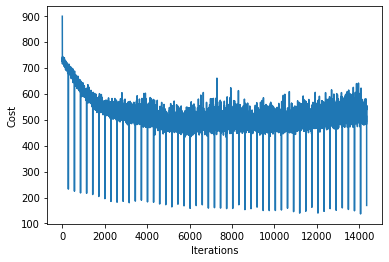

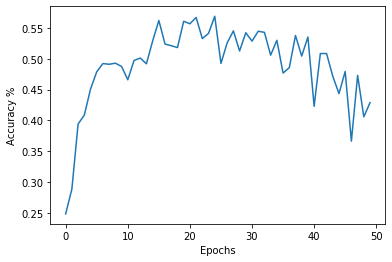

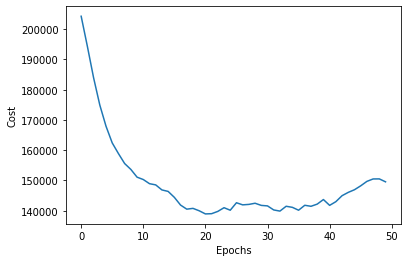

In [27]:
plt.plot(range(len(reg_nn1_iteration_losses)), reg_nn1_iteration_losses)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#plt.savefig('loss.png', dpi=300)
plt.show()


plt.plot(range(epochs), reg_nn1_epoch_accuracies)
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()


plt.plot(range(epochs), reg_nn1_epoch_costs)
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()



In [28]:
corrects, wrongs = reg_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')



  Testing accuracy after training  0.40738322065150584 



### 2nd Regularized Model 

In [29]:
np.random.seed(8)
np.random.RandomState(8)

reg_nn2 = regularized_nn(architecture = [1024,100,100,10], bias = False, activation = 'RELU',  
              learning_rate = 0.0001, regularizer_l2 = True,  L2_term = 0.1)

In [30]:
### Test the network with no training 
corrects, wrongs = reg_nn2.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy before TRAINING ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy before TRAINING  0.07559926244622003 



In [31]:
reg_nn2_iteration_losses = [] #should be the same len aas the number of iterations
reg_nn2_epoch_accuracies = []
reg_nn2_epoch_costs = [] # should match the number of epochs set

In [32]:
## Training script 
np.random.seed(8)
np.random.RandomState(8)


for epoch in range(epochs):

            # cycle through all minibatches of data
            n_samples = train_imgs.shape[0]
            #shuffle entire dataset indices for proper mini-batch GD
            indices = np.arange(train_imgs.shape[0])
            np.random.shuffle(indices)
            
            for start in range(0, n_samples, batch_size):
            
                  end = min (start + batch_size, n_samples)
                  batch_indices = indices[start:end]
                  
                  #train nn on mini-batch data
                  reg_nn2.train_on_batch(train_imgs[batch_indices],train_labels_one_hot[batch_indices])
                  
                  #get mnin-batch cross-entropy loss term 
                  cel = reg_nn2.batch_loss
                  
                  #create l2 term for loss calculation
                  #l2_cost = (nn.L2_term / 2) * np.sum(np.square(nn.weights))
                  
                  weight_squared_sums = [np.sum(np.square(weight_matrix)) for weight_matrix in reg_nn2.weights]
                  
                  l2_cost = (reg_nn2.L2_term / 2) * np.array(weight_squared_sums).sum()
            
                  overall_cost = cel + l2_cost                       
                  
                  #save loss on the mini-batch
                  reg_nn2_iteration_losses.append(overall_cost)
                  
            epoch_loss = reg_nn2_iteration_losses[-num_of_batches:] # GET THE LAST X ITERTIONS THAT MAKE UP THE EPOCH 
            reg_nn2_epoch_costs.append(np.array(epoch_loss).sum())

            
            #Evaluate training accuracy after each iteration
            corrects, wrongs = reg_nn2.evaluate(train_imgs, train_labels) #this is the integer representation
            accu = corrects / ( corrects + wrongs)
            print('_________________________________________________\n')
            print("Training accuracy after epoch ", accu, '\n')
            reg_nn2_epoch_accuracies.append(accu)
            
            #epoch completed 
            print ("Epochs completed {} / {} ".format(epoch+1,epochs))

_________________________________________________

Training accuracy after epoch  0.25167560779174686 

Epochs completed 1 / 50 
_________________________________________________

Training accuracy after epoch  0.2875902644115921 

Epochs completed 2 / 50 
_________________________________________________

Training accuracy after epoch  0.39990717610603765 

Epochs completed 3 / 50 
_________________________________________________

Training accuracy after epoch  0.4214068280164353 

Epochs completed 4 / 50 
_________________________________________________

Training accuracy after epoch  0.4572122800551483 

Epochs completed 5 / 50 
_________________________________________________

Training accuracy after epoch  0.4864381560806476 

Epochs completed 6 / 50 
_________________________________________________

Training accuracy after epoch  0.5064908472910439 

Epochs completed 7 / 50 
_________________________________________________

Training accuracy after epoch  0.48638355379008147 

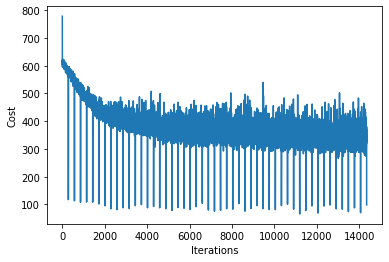

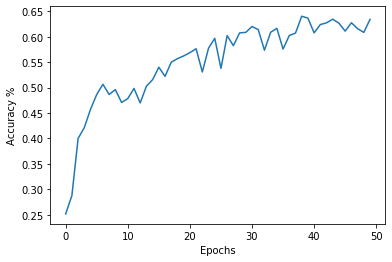

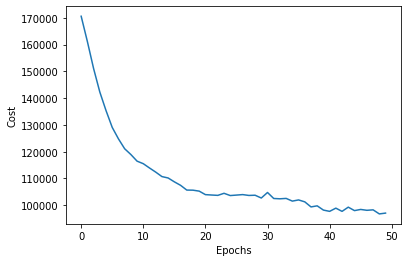

In [33]:
plt.plot(range(len(reg_nn2_iteration_losses)), reg_nn2_iteration_losses)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#plt.savefig('loss.png', dpi=300)
plt.show()


plt.plot(range(epochs), reg_nn2_epoch_accuracies)
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()


plt.plot(range(epochs), reg_nn2_epoch_costs)
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()



In [34]:
corrects, wrongs = reg_nn2.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy after training  0.6035648432698217 



### Models evaluation. 


### Reg Model_1 vs Reg Model_2

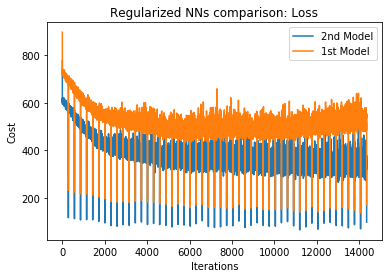

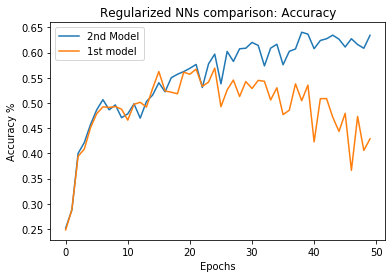

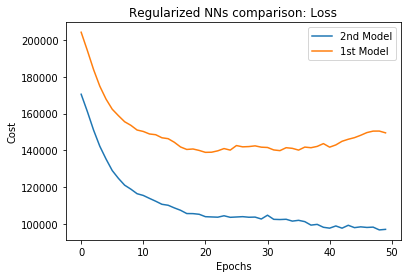

In [35]:
plt.plot(range(len(reg_nn2_iteration_losses)), reg_nn2_iteration_losses, label = '2nd Model')
plt.plot(range(len(reg_nn1_iteration_losses)), reg_nn1_iteration_losses, label = '1st Model')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.legend(loc="upper right")
plt.title('Regularized NNs comparison: Loss')
plt.savefig('Result metrics//Regularized_NNs_loss.png', dpi=300)
plt.show()


plt.plot(range(epochs), reg_nn2_epoch_accuracies, label = '2nd Model')
plt.plot(range(epochs), reg_nn1_epoch_accuracies, label = '1st model')
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.title('Regularized NNs comparison: Accuracy')
plt.savefig('Result metrics//Regularized_NNs_accuracy.png', dpi=300)
plt.show()


plt.plot(range(epochs), reg_nn2_epoch_costs, label = '2nd Model')
plt.plot(range(epochs), reg_nn1_epoch_costs, label = '1st Model')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.title('Regularized NNs comparison: Loss')
plt.savefig('Result metrics//Regularized_NNs_loss_epochs.png', dpi=300)
plt.show()


### It is evident that too high regularization parameter is detrimental to learning.
### The Model performance in terms of both training and testing accuracy is significant.

### NN class with  Dropout regularization

* Optional regularization
* New feedforward method with Dropout 
* New backpropagation method with Dropout
* Flexible Dropout rate method set (one setting for all hidden layers)
* No Dropout is applied in the input Layer


In [36]:
##
## Implementaiton of Dropout NN class
##
class dropout_nn:
    
      
    def linear_activation_batch(self,matrix):
          
          return matrix

      
    def relu_activation_batch(self,matrix):
          
          
          return np.maximum(0,matrix)
    
      
    def relu_derivative_batch(self, matrix):
          
        matrix[matrix<=0] = 0
        matrix[matrix>0] = 1
        
        return matrix
  
      
    def softmax_activation_batch(self, matrix):
          
        z = matrix - np.max(matrix, axis=-1, keepdims=True) #prevent overflow here, with this 
        numerator = np.exp(z)
        denominator = np.sum(numerator,1)
        denominator = denominator.reshape(matrix.shape[0],-1) # (number of samples, 1)
        
        probs = numerator/denominator
        
        return probs      
          

    
    def __init__(self, architecture = [1024, 100, 10] , bias = False, activation = 'RELU',  learning_rate = 0.0015, 
                 regularizer_l2 = False, L2_term = 0.005, dropout = False, dropout_rate = 0.8):
        
        self.bias = bias
        
        self.activation = activation
        
        self.architecture = architecture
        
        self.learning_rate = learning_rate
        
        self.regularizer_l2 = regularizer_l2
        
        self.L2_term = L2_term
        
        self.dropout = dropout
        
        self.dropout_rate = dropout_rate
        
        self.initialize_weights() #initialize weights by taking into account the architecture
        
      
        
    def initialize_weights(self):
            
            self.weights = []
            self.biases = []
            
            #initialize weights for arbitrary lenght NN 
            
            for _ in range(len(self.architecture)-1):
                
                weight_matrix = np.random.normal(loc=0.0,scale=2/np.sqrt(self.architecture[_]+self.architecture[_+1]),
                                                 size=(self.architecture[_],self.architecture[_+1]))
                
                self.weights.append(weight_matrix)
                
                
    def calculate_cost_batch(self, probs, labels):
          
          losses = labels * np.log(probs+ 1e-5) # works against underflow
          
          #losses
          
          batch_loss = - losses.sum()
          
          return batch_loss

    def train_on_batch(self, batch_samples, batch_labels):
        
          if self.dropout == False:
                batch_probs, hidden_activations = self.forward_batch_propagation(batch_samples)  
          else:
                batch_probs, hidden_activations, activation_masks = self.forward_batch_propagation_dropout(batch_samples)
                      
          #calculate batch loss      
          batch_loss = self.calculate_cost_batch( batch_probs, batch_labels )
          self.batch_loss = batch_loss       
                
          ####update weights for the batch, first backpropagate the error, and then update each weight matrix
          if self.dropout == False : 
                
                self.update_weights_batch( batch_probs, hidden_activations, batch_labels, batch_samples )
                
          
          else:
                self.update_weights_batch_dropout( batch_probs, hidden_activations, batch_labels, batch_samples, activation_masks) 
                
                
          return True       
    
      
      
      
    def forward_batch_propagation_dropout(self,batch_samples):
          
          # create activation masks for every hidden layer (No masks will be create for the input and output layers)
          
          activation_masks = [] 
          
          nn_layers = self.architecture[1:-1] # grab the dimensions of the hidden layers, excluding the first and last layers 
          
          # nn_layers --> number of masks 
          
          for layer in nn_layers:
                
                activation_mask = (np.random.rand(batch_samples.shape[0],layer) < self.dropout_rate) / self.dropout_rate
                
                activation_masks.append(activation_mask)
                
         
          #activation_masks.insert(0, np.ones(batch_samples.shape))   #add ones matrix for the first transformation
         ## forward propagation using masks
         
         # 1. linear transformation 
         
         # 2. non-linear activation
         
         # 3. activation_mask application
         
          input_batch = batch_samples
          hidden_activations = [] # 
          
          mask_counter = 0
        
          for weight in self.weights:
            
              trans_batch = np.dot(input_batch, weight) #matrix multiplication, no biasses added
            
              if weight.shape[1] == 10: #if we are multipying the by the final weight matrix
                  #apply softmax activation to the batch
                  probabilities_batch = self.softmax_activation_batch(trans_batch)
                  break
                
                
              elif self.activation == 'RELU':   
                
                  output_batch = self.relu_activation_batch(trans_batch)
                  output_batch = output_batch * activation_masks[mask_counter] #dropout 
                  hidden_activations.append(output_batch)
                  
                  mask_counter += 1
                  
                
              elif self.activation == 'LINEAR':
                
                  output_batch = self.linear_activation_batch(trans_batch)
                  hidden_activations.append(output_batch)
        
              input_batch = output_batch
         
         
          
          return probabilities_batch, hidden_activations, activation_masks
    
      
    def update_weights_batch_dropout(self,batch_probs, hidden_activations,  batch_labels, batch_samples ,activation_masks) :
          
          
          hidden_activations.reverse()
          
          # error to propagate 
          output_layer_error = batch_probs - batch_labels 
          
          
          weights_list = list(self.weights)
          weights_list.reverse()
          
          layer_errors = []  
          layer_errors.append(output_layer_error.T)
                   
          error_l = output_layer_error     
          
          # back-prop using the activation masks for dropout
    
          for i in range(len(weights_list)-1):
                
                    
                error_term = np.dot(weights_list[i],error_l.T)
                
                derivative_term = self.relu_derivative_batch(hidden_activations[i].T)
                
                #element-wise multiplication for the full error expression
                error_l_minus = error_term * derivative_term
                
                layer_errors.append(error_l_minus)
                
                error_l = error_l_minus.T



          activations = list(hidden_activations)
          activations.reverse()
          
          activations.insert(0,batch_samples)
          activations.reverse()       
          
          
          ## weight updates using the hidden activations and layer error
          activation_masks.reverse()
          activation_masks.append( np.ones(batch_samples.shape)) 
          mask_counter = 0
          
          for i in range(len(layer_errors)):
                
                masked_activation = activations[i] * activation_masks[mask_counter] 
                weight_update = np.dot(layer_errors[i], masked_activation)
                
                weights_list[i] -= self.learning_rate * weight_update.T #take some of the gradient using learning rate
                
                mask_counter += 1
          
          weights_list.reverse()
          
          
          # finally replace the weights with upadted ones 
          self.weights = weights_list
          
          
    def forward_batch_propagation(self, batch_samples):
        
        # propagate the batch signal through the network, not using biases 
        input_batch = batch_samples
        hidden_activations = [] # needed for gradient calculation
        
        for weight in self.weights:
            
            trans_batch = np.dot(input_batch, weight) #matrix multiplication, no biasses added
            
            if weight.shape[1] == 10: #if we are multipying the by the final weight matrix
                #apply softmax activation to the batch
                probabilities_batch = self.softmax_activation_batch(trans_batch)
                break
                
                
            elif self.activation == 'RELU':   
                
                output_batch = self.relu_activation_batch(trans_batch)
                hidden_activations.append(output_batch)
                
            elif self.activation == 'LINEAR':
                
                output_batch = self.linear_activation_batch(trans_batch)
                hidden_activations.append(output_batch)

                
            input_batch = output_batch
                
            
        
        return probabilities_batch, hidden_activations
                  
        
     
    def update_weights_batch(self, batch_probs, hidden_activations, batch_labels, batch_samples) :
          
          hidden_activations.reverse()
          
          output_layer_error = batch_probs - batch_labels # error to propagate 
          
          weights_list = list(self.weights)
          weights_list.reverse()
          
          layer_errors = []  # reverse this if needed
          
          layer_errors.append(output_layer_error.T)
         
          
          error_l = output_layer_error
          
          # for an NN with 2 hidden layers, 2 back-propagation methods will be run
          
          # add clause for linear and sigmoid derivative apropriatly.
          
          # back-prop of the eror to every layer in the network 
          for i in range(len(weights_list)-1):
                
                error_term = np.dot(weights_list[i],error_l.T)
                
                derivative_term = self.relu_derivative_batch(hidden_activations[i].T)
                
                #element-wise multiplication for the full error expression
                error_l_minus = error_term * derivative_term
                
                layer_errors.append(error_l_minus)
                
                error_l = error_l_minus.T
                
          activations = list(hidden_activations)
          activations.reverse()
          
          activations.insert(0,batch_samples)
          activations.reverse()

          for i in range(len(layer_errors)):
                
                weight_update = np.dot(layer_errors[i],activations[i])
                
                weights_list[i] -= self.learning_rate * weight_update.T #take some of the gradient using learning rate
                
          
          weights_list.reverse()
          
          self.weights = weights_list

    def evaluate(self,data,labels):
        
        corrects, wrongs = 0, 0
        
        for i in range(len(data)):
              
            res = self.infer_sample(data[i])
            #sumaaaaaaaaaaaa = res.sum()
            res_max = res.argmax()
            #ruin=labels[i]
            
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs    



    def infer_sample(self,sample):
        #use this function to get a sample prediction, after the network has been trained   
        prediction = self.signal_propagation_test(sample)
          
        return prediction  
  
   
    def signal_propagation_test(self,sample):
                              
          trans_vector = sample
          
          for weight in self.weights:
                
                trans_vector = np.dot(trans_vector, weight) # matrix transformation 
                
                trans_vector = self.relu_activation_batch(trans_vector) # relu activation, no bias added
                
          prediction = trans_vector 
          
          return prediction
                

In [37]:
np.random.seed(8)
np.random.RandomState(8)

drop_nn1 = dropout_nn( architecture = [1024,100,100,10], bias = False, activation = 'RELU',  
                     learning_rate = 0.0001, dropout = True, dropout_rate = 0.4)


In [38]:
print('\n')
weights = drop_nn1.weights

### Test the network with no training 
corrects, wrongs = drop_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy before TRAINING ", corrects / ( corrects + wrongs), '\n')




  Testing accuracy before TRAINING  0.07559926244622003 



In [39]:
# Mini-batch gradient descent 
batch_size = 256 #size of the mini-batch
epochs = 50
drop_nn1_iteration_losses = [] #should be the same len aas the number of iteratios
drop_nn1_epoch_accuracies = []

#Print training elements
num_of_batches = round(train_imgs.shape[0] / batch_size) +1
num_of_iterations = epochs * num_of_batches

In [40]:
print ('\n Batch size',batch_size )
print('_________________________________________________')


print ('\n Number of batches per epoch',num_of_batches )
print('_________________________________________________')

print ('\n Number of iterations to perform:',num_of_iterations )
print('_________________________________________________')
print ('\n To perform Dropout:',drop_nn1.dropout )
print('_________________________________________________')
print('_________________________________________________')


 Batch size 256
_________________________________________________

 Number of batches per epoch 287
_________________________________________________

 Number of iterations to perform: 14350
_________________________________________________

 To perform Dropout: True
_________________________________________________
_________________________________________________


In [41]:
#
# Training loop
#
np.random.seed(8)
np.random.RandomState(8)


for epoch in range(epochs):

            # cycle through all minibatches of data
            n_samples = train_imgs.shape[0]
            #shuffle entire dataset indices for proper mini-batch GD
            indices = np.arange(train_imgs.shape[0])
            np.random.shuffle(indices)
            
            for start in range(0, n_samples, batch_size):
            
                  end = min (start + batch_size, n_samples)
                  batch_indices = indices[start:end]
                  
                  #train nn on mini-batch data
                  drop_nn1.train_on_batch(train_imgs[batch_indices],train_labels_one_hot[batch_indices])
                  
                  #save loss on the mini-batch
                  drop_nn1_iteration_losses.append(drop_nn1.batch_loss)

            
            #Evaluate training accuracy after each iteration
            corrects, wrongs = drop_nn1.evaluate(train_imgs, train_labels) #this is the integer representation
            accu = corrects / ( corrects + wrongs)
            print('_________________________________________________\n')
            print("Training accuracy after epoch ", accu, '\n')
            drop_nn1_epoch_accuracies.append(accu)
            
            #epoch completed 
            print ("Epochs completed {} / {} ".format(epoch+1,epochs))


_________________________________________________

Training accuracy after epoch  0.1892924908199899 

Epochs completed 1 / 50 
_________________________________________________

Training accuracy after epoch  0.18918328623885772 

Epochs completed 2 / 50 
_________________________________________________

Training accuracy after epoch  0.18884202192281965 

Epochs completed 3 / 50 
_________________________________________________

Training accuracy after epoch  0.18833695073508333 

Epochs completed 4 / 50 
_________________________________________________

Training accuracy after epoch  0.18895122650395185 

Epochs completed 5 / 50 
_________________________________________________

Training accuracy after epoch  0.1881321921454605 

Epochs completed 6 / 50 
_________________________________________________

Training accuracy after epoch  0.19269148340772896 

Epochs completed 7 / 50 
_________________________________________________

Training accuracy after epoch  0.205509371118118

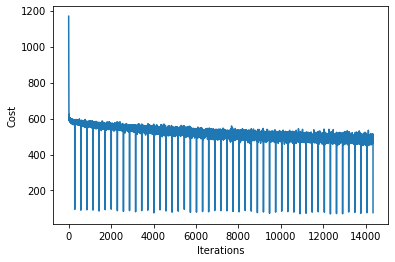

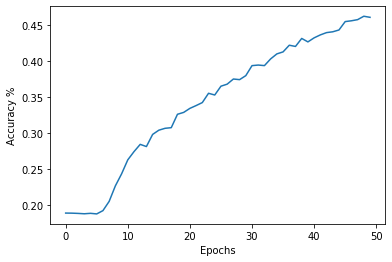


  Testing accuracy after training  0.44779502151198525 



In [42]:
plt.plot(range(len(drop_nn1_iteration_losses)), drop_nn1_iteration_losses)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#plt.savefig('loss.png', dpi=300)
plt.show()

plt.plot(range(epochs), drop_nn1_epoch_accuracies)
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()

### Test the network with no training 
corrects, wrongs = drop_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')

### 2nd Model, with less regularization 

In [43]:
np.random.seed(8)
np.random.RandomState(8)

drop_nn2 = dropout_nn( architecture = [1024,100,100,10], bias = False, activation = 'RELU',  
                     learning_rate = 0.0001, dropout = True, dropout_rate = 0.8)

In [44]:
print('\n')
weights = drop_nn2.weights

### Test the network with no training 
corrects, wrongs = drop_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy before TRAINING ", corrects / ( corrects + wrongs), '\n')




  Testing accuracy before TRAINING  0.44779502151198525 



In [45]:
drop_nn2_iteration_losses = [] #should be the same len aas the number of iteratios
drop_nn2_epoch_accuracies = []

In [46]:
#
# Training loop
#
np.random.seed(8)
np.random.RandomState(8)

for epoch in range(epochs):

            # cycle through all minibatches of data
            n_samples = train_imgs.shape[0]
            #shuffle entire dataset indices for proper mini-batch GD
            indices = np.arange(train_imgs.shape[0])
            np.random.shuffle(indices)
            
            for start in range(0, n_samples, batch_size):
            
                  end = min (start + batch_size, n_samples)
                  batch_indices = indices[start:end]
                  
                  #train nn on mini-batch data
                  drop_nn2.train_on_batch(train_imgs[batch_indices],train_labels_one_hot[batch_indices])
                  
                  #save loss on the mini-batch
                  drop_nn2_iteration_losses.append(drop_nn2.batch_loss)

            
            #Evaluate training accuracy after each iteration
            corrects, wrongs = drop_nn2.evaluate(train_imgs, train_labels) #this is the integer representation
            accu = corrects / ( corrects + wrongs)
            print('_________________________________________________\n')
            print("Training accuracy after epoch ", accu, '\n')
            drop_nn2_epoch_accuracies.append(accu)
            
            #epoch completed 
            print ("Epochs completed {} / {} ".format(epoch+1,epochs))

_________________________________________________

Training accuracy after epoch  0.20350273693981463 

Epochs completed 1 / 50 
_________________________________________________

Training accuracy after epoch  0.2797138839974337 

Epochs completed 2 / 50 
_________________________________________________

Training accuracy after epoch  0.3645658435371364 

Epochs completed 3 / 50 
_________________________________________________

Training accuracy after epoch  0.4299657370626698 

Epochs completed 4 / 50 
_________________________________________________

Training accuracy after epoch  0.4522434716136342 

Epochs completed 5 / 50 
_________________________________________________

Training accuracy after epoch  0.4767735506504498 

Epochs completed 6 / 50 
_________________________________________________

Training accuracy after epoch  0.48159220279290715 

Epochs completed 7 / 50 
_________________________________________________

Training accuracy after epoch  0.5140942162523718 


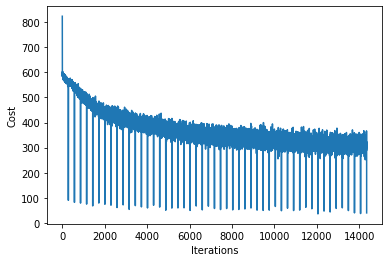

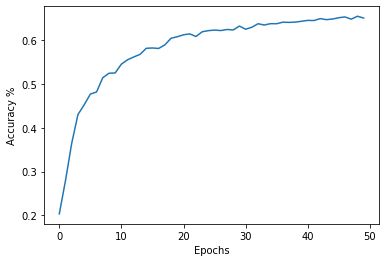


  Testing accuracy after training  0.6119007375537799 



In [47]:
plt.plot(range(len(drop_nn2_iteration_losses)), drop_nn2_iteration_losses)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#plt.savefig('loss.png', dpi=300)
plt.show()

plt.plot(range(epochs), drop_nn2_epoch_accuracies)
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
#plt.savefig('loss.png', dpi=300)
plt.show()

### Test the network with no training 
corrects, wrongs = drop_nn2.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')

### Model Comparison

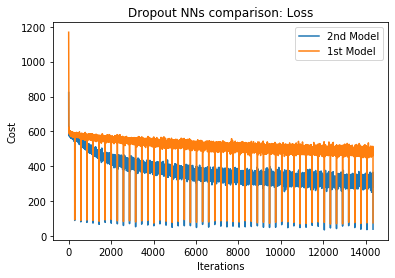

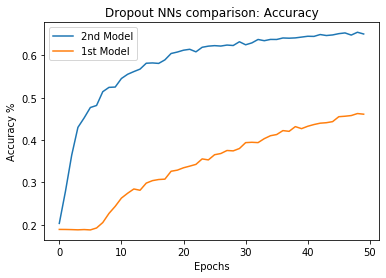

In [48]:
plt.plot(range(len(drop_nn2_iteration_losses)), drop_nn2_iteration_losses, label = '2nd Model')
plt.plot(range(len(drop_nn1_iteration_losses)), drop_nn1_iteration_losses, label = '1st Model')
plt.legend(loc="upper right")
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Dropout NNs comparison: Loss')
plt.savefig('Result metrics//Dropout_NNs_loss.png', dpi=300)
plt.show()

plt.plot(range(epochs), drop_nn2_epoch_accuracies, label = '2nd Model')
plt.plot(range(epochs), drop_nn1_epoch_accuracies, label = '1st Model')
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.title('Dropout NNs comparison: Accuracy')
plt.savefig('Result metrics//Dropout_NNs_accuracy.png', dpi=300)
plt.show()


In [49]:
corrects, wrongs = drop_nn2.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy after training  0.6119007375537799 



In [50]:
corrects, wrongs = drop_nn1.evaluate(test_imgs, test_labels)
print("\n  Testing accuracy after training ", corrects / ( corrects + wrongs), '\n')


  Testing accuracy after training  0.44779502151198525 



# END OF NOTEBOOK 